In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns# for pretty plots
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Dataset Description

Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders.  The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between `bad` connections, called intrusions or attacks, and `good` normal connections.

The 1998 DARPA Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection.  A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided.  The 1999 KDD intrusion detection contest uses a version of this dataset.

Lincoln Labs set up an environment to acquire nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN.  They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks.

The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic.  This was processed into about five million connection records.  Similarly, the two weeks of test data yielded around two million connection records.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.

Attacks fall into four main categories:

    DOS: denial-of-service, e.g. syn flood;
    R2L: unauthorized access from a remote machine, e.g. guessing password;
    U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
    probing: surveillance and other probing, e.g., port scanning.

It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more realistic.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.  The datasets contain a total of 24 training attack types, with an additional 14 types in the test data only. 

# Anomaly Detection

Anomaly detection (also outlier detection) is the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data. The anomalous items translate to some kind of problem.

# Data Preparation

In [2]:
columns = ['duration', 'protocol', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
           'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
           'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
           'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'other']

In [3]:
train_df = pd.read_csv('data/KDDTrain+.txt', header=None, names=columns)
test_df = pd.read_csv('data/KDDTest+.txt', header=None, names=columns)

Concatenate the datasets into one large dataframe (we will break them up into train-test splits later on)

In [4]:
df = pd.concat([train_df, test_df])
df.shape

(148517, 43)

# Data Exploration

The predictor label is attack_type

In [5]:
df.attack_type.values

array(['normal', 'normal', 'neptune', ..., 'back', 'normal', 'mscan'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'neptune'),
  Text(2, 0, 'warezclient'),
  Text(3, 0, 'ipsweep'),
  Text(4, 0, 'portsweep'),
  Text(5, 0, 'teardrop'),
  Text(6, 0, 'nmap'),
  Text(7, 0, 'satan'),
  Text(8, 0, 'smurf'),
  Text(9, 0, 'pod'),
  Text(10, 0, 'back'),
  Text(11, 0, 'guess_passwd'),
  Text(12, 0, 'ftp_write'),
  Text(13, 0, 'multihop'),
  Text(14, 0, 'rootkit'),
  Text(15, 0, 'buffer_overflow'),
  Text(16, 0, 'imap'),
  Text(17, 0, 'warezmaster'),
  Text(18, 0, 'phf'),
  Text(19, 0, 'land'),
  Text(20, 0, 'loadmodule'),
  Text(21, 0, 'spy'),
  Text(22, 0, 'perl'),
  Text(23, 0, 'saint'),
  Text(24, 0, 'mscan'),
  Text(25, 0, 'apache2'),
  Text(26, 0, 'snmpgetattack'),
  Text(27, 0, 'processtable'),
  Text(28, 0, 'httptunnel'),
  Text(29, 0, 'ps'),
  Text(30, 0, 'snmpguess'),
  Text(31, 0,

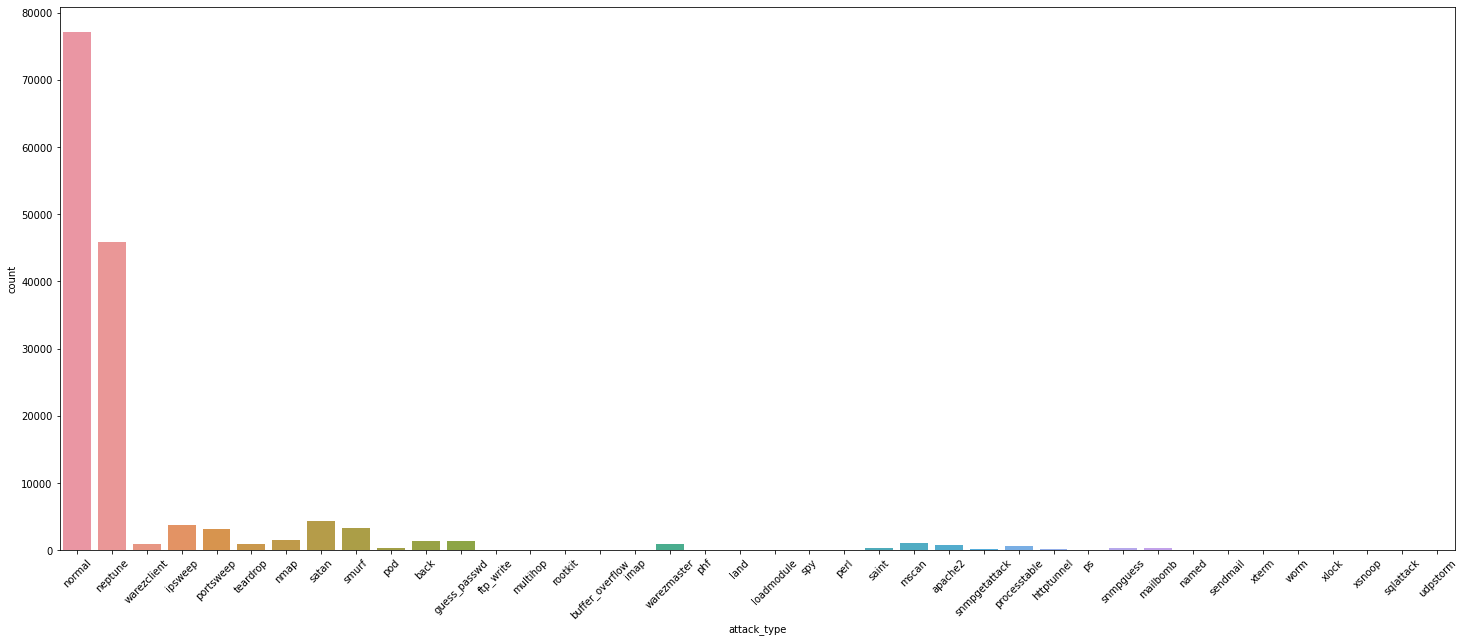

In [6]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="attack_type", data=df)
plt.xticks(rotation=45)

Clearly the data is unevenly distributed.  Let's make a new variable called attack_set to which contains the superset the attack type belongs to

In [7]:
df['attack_set'] = df['attack_type']

In [8]:
# DOS
df.loc[df.attack_set == 'neptune', 'attack_set'] = 'dos'
df.loc[df.attack_set == 'back', 'attack_set'] = 'dos' 
df.loc[df.attack_set == 'land', 'attack_set'] = 'dos'
df.loc[df.attack_set == 'pod', 'attack_set'] = 'dos' 
df.loc[df.attack_set == 'smurf', 'attack_set'] = 'dos'
df.loc[df.attack_set == 'teardrop', 'attack_set'] = 'dos' 
df.loc[df.attack_set == 'mailbomb', 'attack_set'] = 'dos'
df.loc[df.attack_set == 'processtable', 'attack_set'] = 'dos' 
df.loc[df.attack_set == 'udpstorm', 'attack_set'] = 'dos'
df.loc[df.attack_set == 'apache2', 'attack_set'] = 'dos' 
df.loc[df.attack_set == 'worm', 'attack_set'] = 'dos'


# User-to-Root (U2R)
df.loc[df.attack_set == 'buffer_overflow', 'attack_set'] = 'u2r' 
df.loc[df.attack_set == 'loadmodule', 'attack_set'] = 'u2r'
df.loc[df.attack_set == 'perl', 'attack_set'] = 'u2r' 
df.loc[df.attack_set == 'rootkit', 'attack_set'] = 'u2r'
df.loc[df.attack_set == 'sqlattack', 'attack_set'] = 'u2r' 
df.loc[df.attack_set == 'xterm', 'attack_set'] = 'u2r'
df.loc[df.attack_set == 'ps', 'attack_set'] = 'u2r'

# Remote-to-Local (R2L)
df.loc[df.attack_set == 'ftp_write', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'guess_passwd', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'imap', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'multihop', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'phf', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'spy', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'warezclient', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'warezmaster', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'xlock', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'xsnoop', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'snmpgetattack', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'httptunnel', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'snmpguess', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'sendmail', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'named', 'attack_set'] = 'r2l'

# Probe attacks
df.loc[df.attack_set == 'satan', 'attack_set'] = 'probe'
df.loc[df.attack_set == 'ipsweep', 'attack_set'] = 'probe'
df.loc[df.attack_set == 'nmap', 'attack_set'] = 'probe'
df.loc[df.attack_set == 'portsweep', 'attack_set'] = 'probe'
df.loc[df.attack_set == 'saint', 'attack_set'] = 'probe'
df.loc[df.attack_set == 'mscan', 'attack_set'] = 'probe'

In [9]:
df.attack_set.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [10]:
df.attack_type.value_counts()

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'dos'),
  Text(2, 0, 'r2l'),
  Text(3, 0, 'probe'),
  Text(4, 0, 'u2r')])

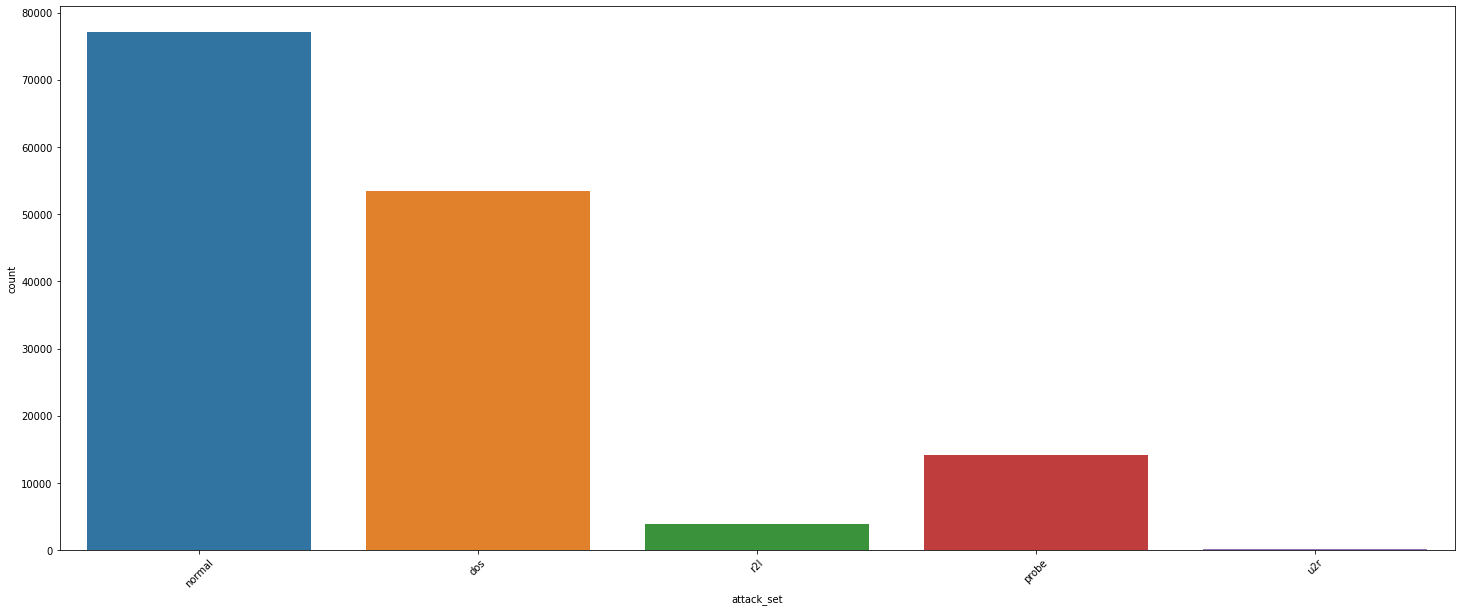

In [11]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="attack_set", data=df)
plt.xticks(rotation=45)

In [12]:
df.attack_set.value_counts()

normal    77054
dos       53387
probe     14077
r2l        3880
u2r         119
Name: attack_set, dtype: int64

In [13]:
df.attack_set.describe()

count     148517
unique         5
top       normal
freq       77054
Name: attack_set, dtype: object

In [14]:
y = df[['attack_type', 'attack_set']].copy()
y.head()

,attack_type,attack_set
0,normal,normal
1,normal,normal
2,neptune,dos
3,normal,normal
4,normal,normal


In [15]:
df.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,other,attack_set
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [16]:
# Let's remove the labels from the dataset now
del df['attack_type']
del df['attack_set']

In [17]:
df.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,other
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


## Learn More About Our Features

In [18]:
df.shape

(148517, 42)

The datset contains 148,517 observations and 42 labels! 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol                     148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13  

In [20]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,other
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### Numerical Features

array([[<AxesSubplot:title={'center':'serror_rate'}>,
        <AxesSubplot:title={'center':'srv_serror_rate'}>,
        <AxesSubplot:title={'center':'rerror_rate'}>],
       [<AxesSubplot:title={'center':'srv_rerror_rate'}>,
        <AxesSubplot:title={'center':'same_srv_rate'}>,
        <AxesSubplot:title={'center':'diff_srv_rate'}>],
       [<AxesSubplot:title={'center':'srv_diff_host_rate'}>,
        <AxesSubplot:title={'center':'dst_host_count'}>,
        <AxesSubplot:title={'center':'dst_host_srv_count'}>]],
      dtype=object)

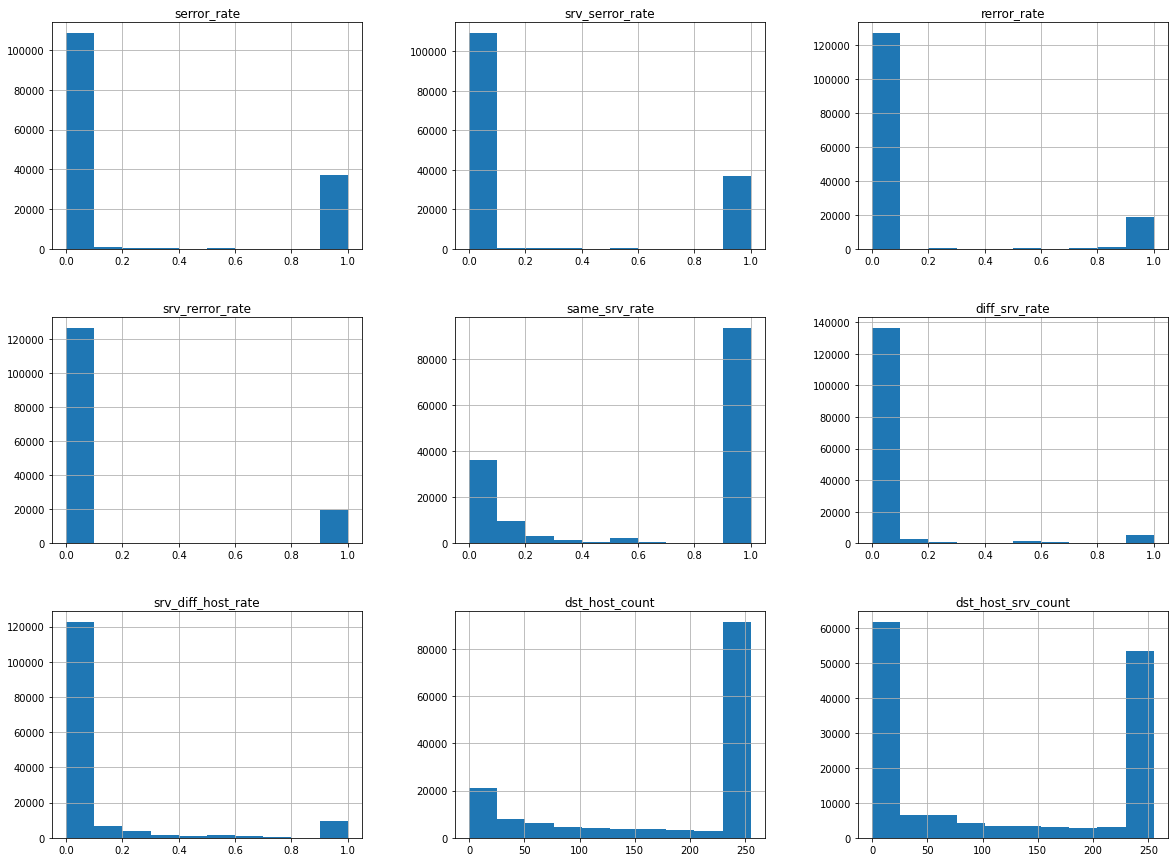

In [21]:
# This is a subset of the numerical features
num_df = df[['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count']]
num_df.hist(figsize=(20,15))

### Categorical Features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 [Text(0, 0, 'ftp_data'),
  Text(1, 0, 'other'),
  Text(2, 0, 'private'),
  Text(3, 0, 'http'),
  Text(4, 0, 'remote_job'),
  Text(5, 0, 'name'),
  Text(6, 0, 'netbios_ns'),
  Text(7, 0, 'eco_i'),
  Text(8, 0, 'mtp'),
  Text(9, 0, 'telnet'),
  Text(10, 0, 'finger'),
  Text(11, 0, 'domain_u'),
  Text(12, 0, 'supdup'),
  Text(13, 0, 'uucp_path'),
  Text(14, 0, 'Z39_50'),
  Text(15, 0, 'smtp'),
  Text(16, 0, 'csnet_ns'),
  Text(17, 0, 'uucp'),
  Text(18, 0, 'netbios_dgm'),
  Text(19, 0, 'urp_i'),
  Text(20, 0, 'auth'),
  Text(21, 0, 'domain'),
  Text(22, 0, 'ftp'),
  Text(23, 0, 'bgp'),
  Text(24, 0, 'ldap'),
  Text(25, 0, 'ecr_i'),
  Text(26, 0, 'gopher'),
  Text(27, 0, '

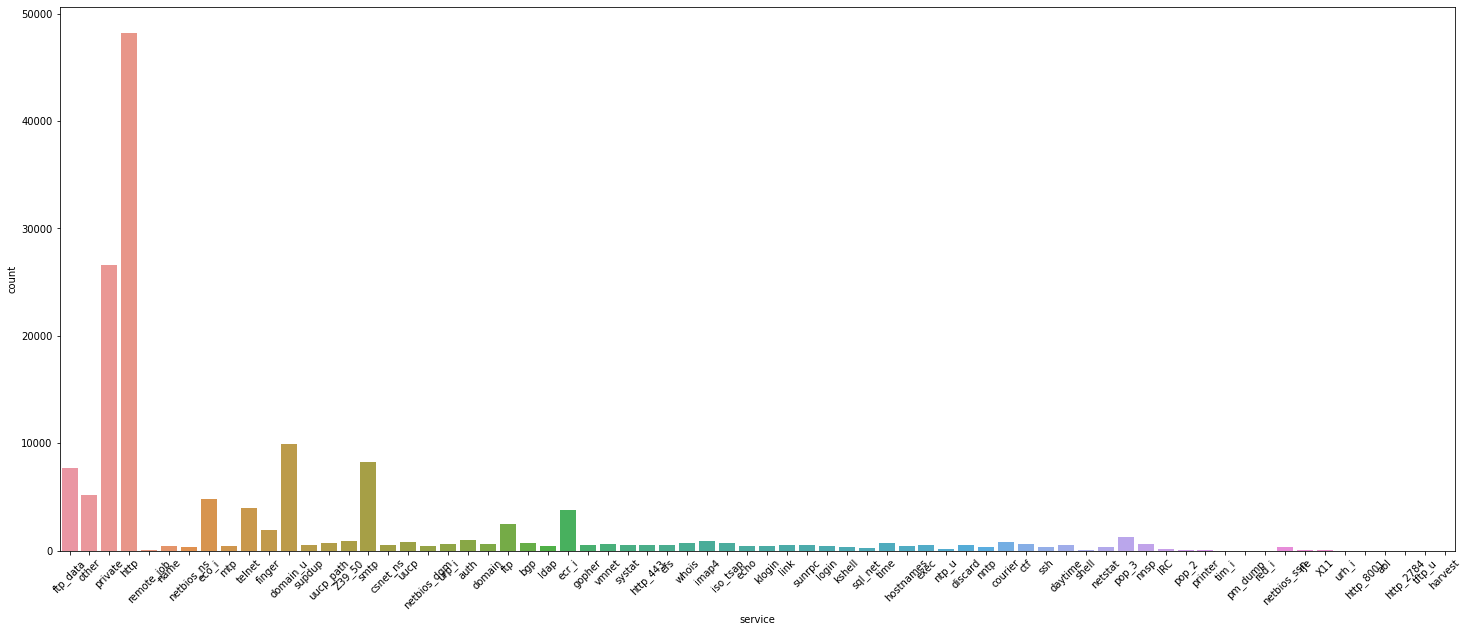

In [22]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="service", data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'SF'),
  Text(1, 0, 'S0'),
  Text(2, 0, 'REJ'),
  Text(3, 0, 'RSTR'),
  Text(4, 0, 'SH'),
  Text(5, 0, 'RSTO'),
  Text(6, 0, 'S1'),
  Text(7, 0, 'RSTOS0'),
  Text(8, 0, 'S3'),
  Text(9, 0, 'S2'),
  Text(10, 0, 'OTH')])

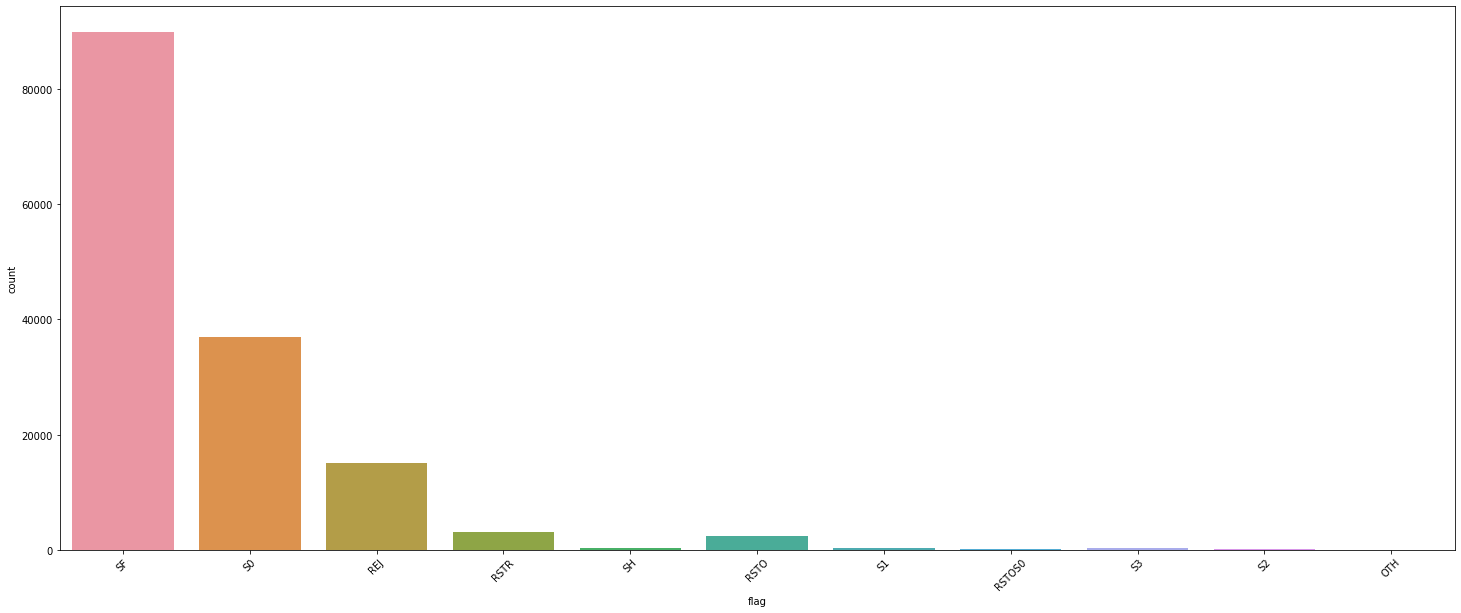

In [23]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="flag", data=df)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

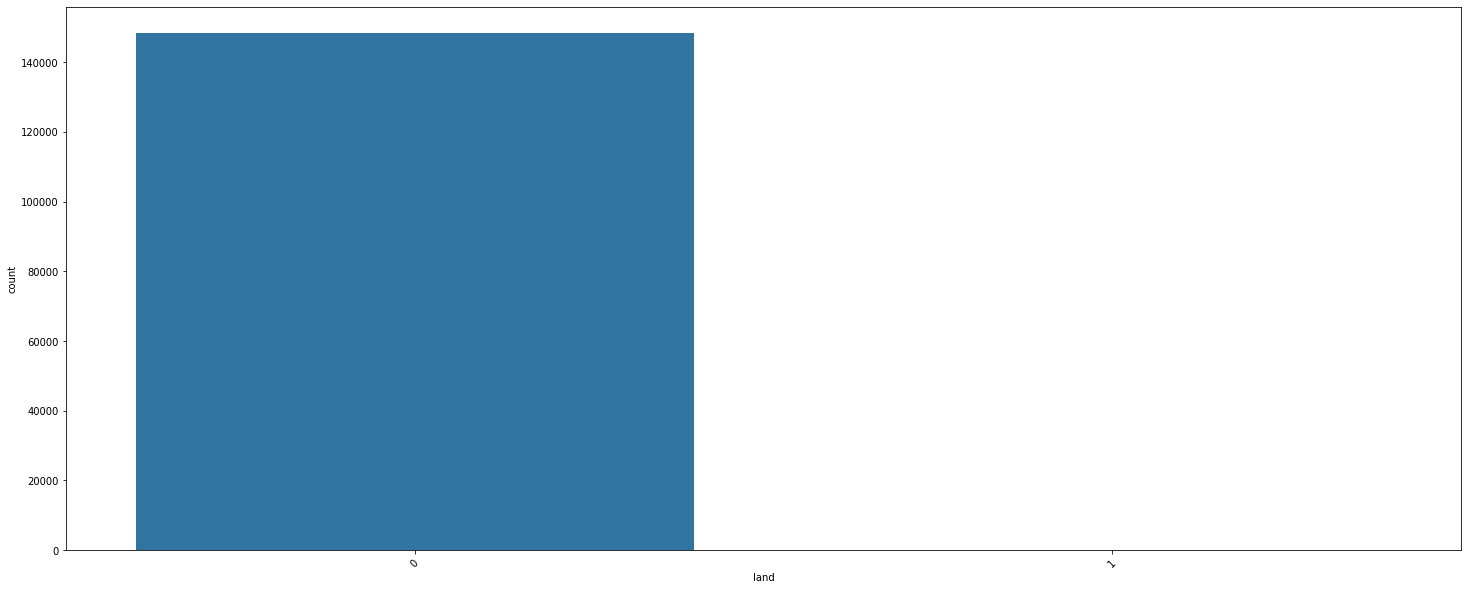

In [24]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="land", data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

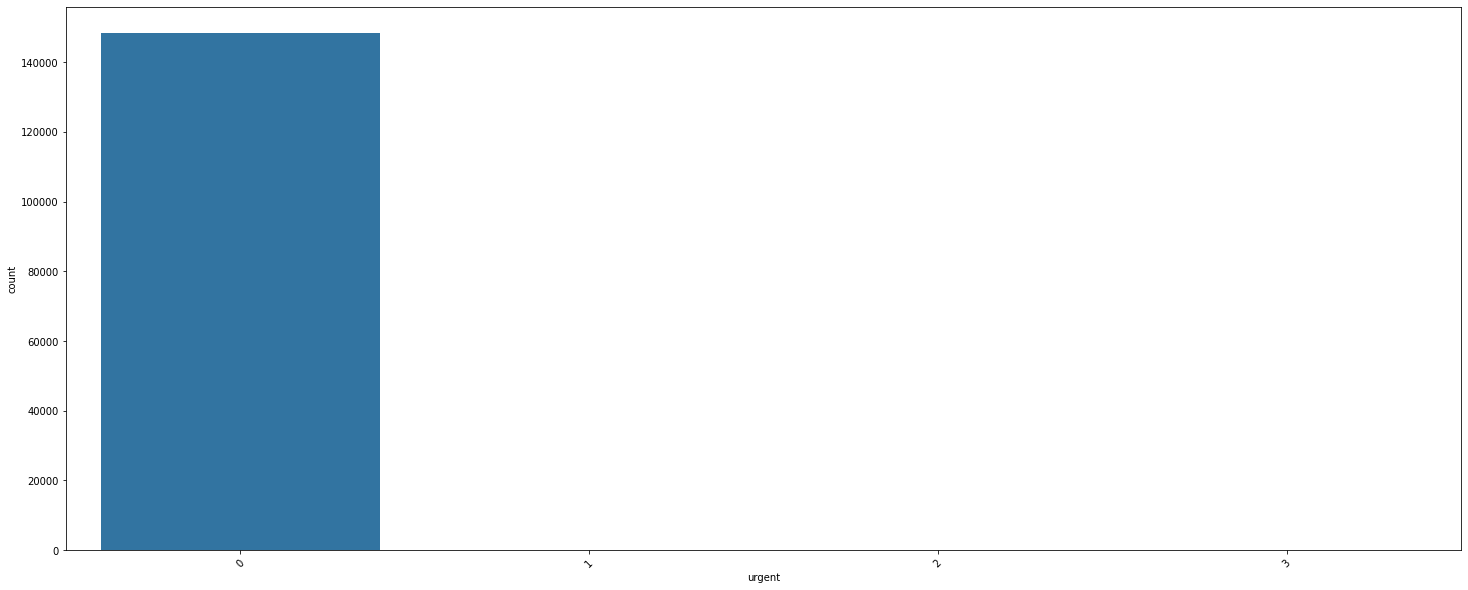

In [25]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="urgent", data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '17'),
  Text(16, 0, '18'),
  Text(17, 0, '19'),
  Text(18, 0, '20'),
  Text(19, 0, '21'),
  Text(20, 0, '22'),
  Text(21, 0, '24'),
  Text(22, 0, '25'),
  Text(23, 0, '28'),
  Text(24, 0, '30'),
  Text(25, 0, '33'),
  Text(26, 0, '44'),
  Text(27, 0, '77'),
  Text(28, 0, '101')])

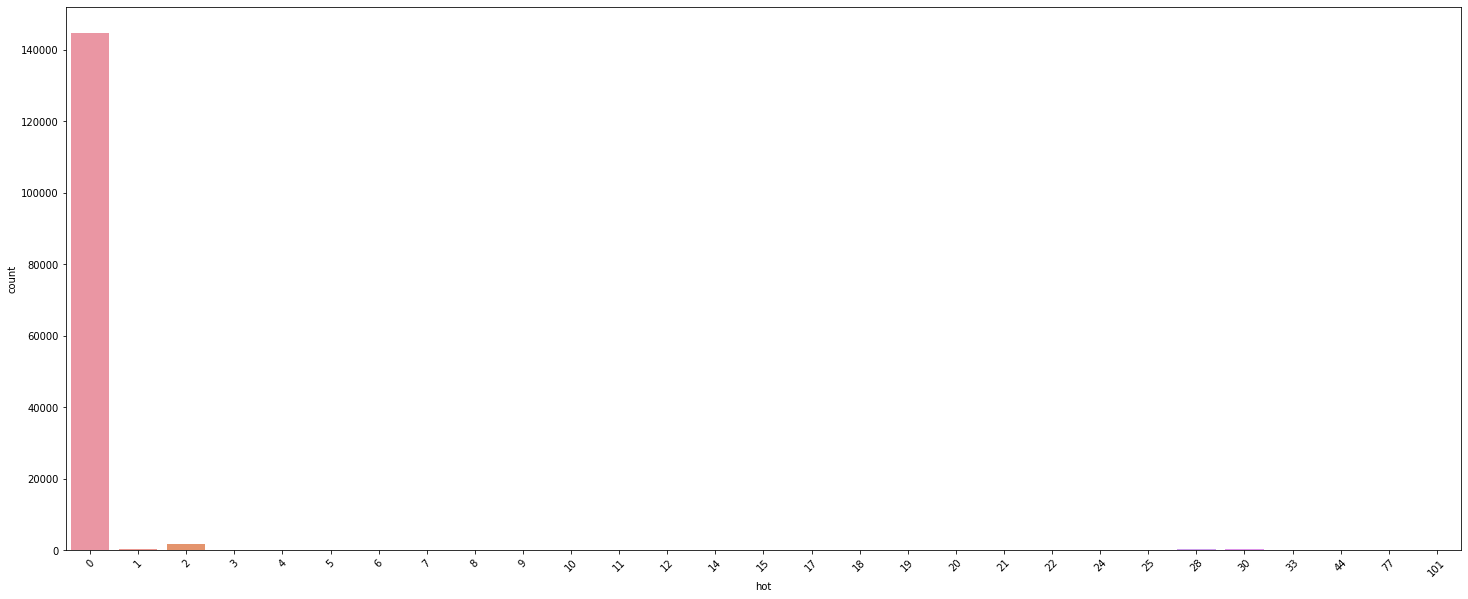

In [26]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="hot", data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

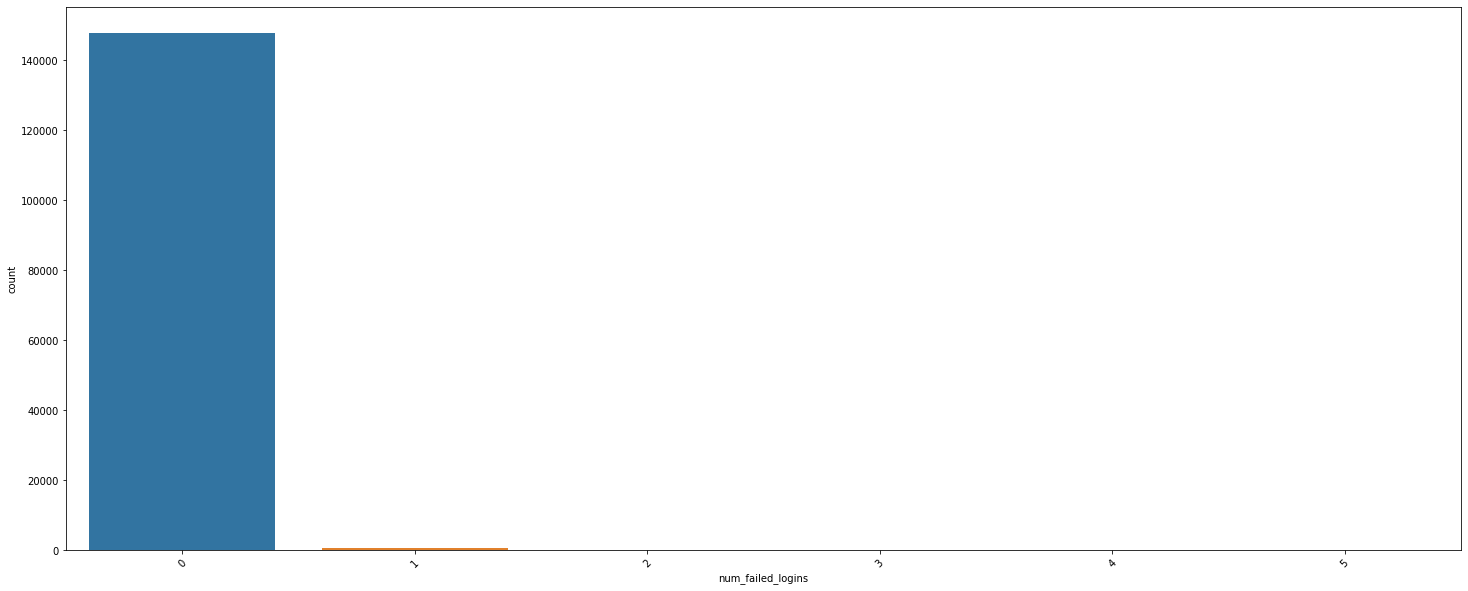

In [27]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="num_failed_logins", data=df)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

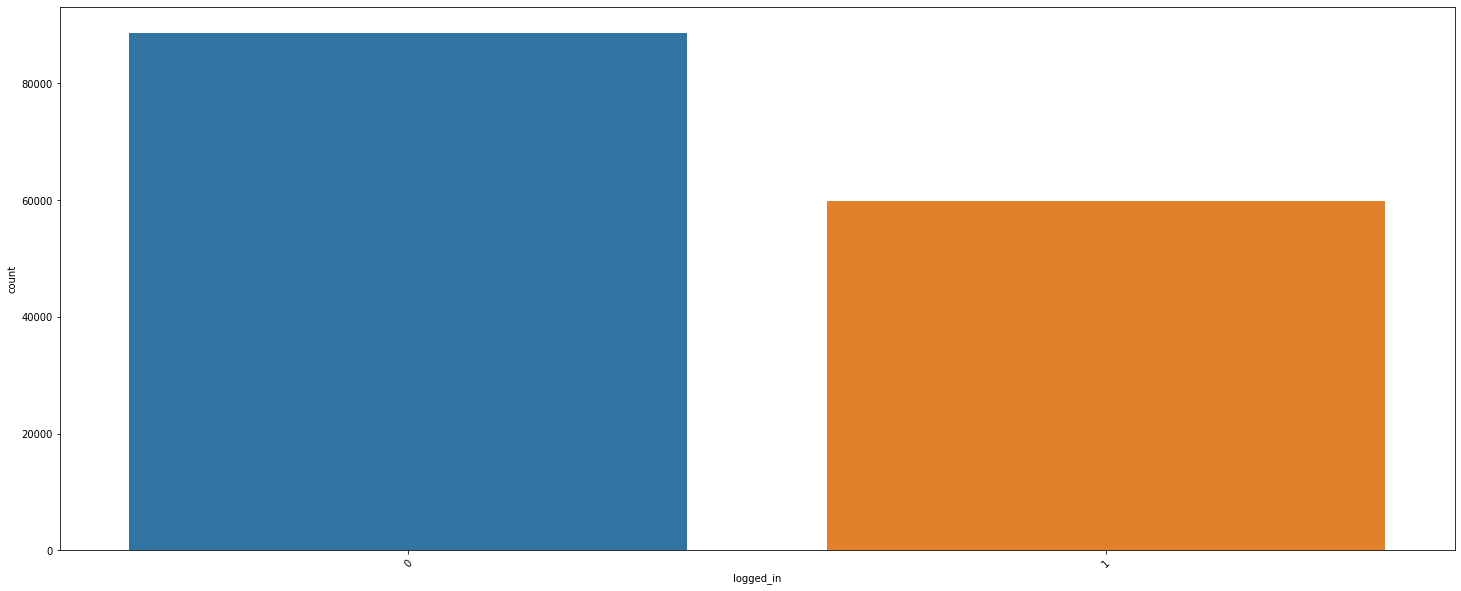

In [28]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="logged_in", data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '25'),
  Text(24, 0, '31'),
  Text(25, 0, '36'),
  Text(26, 0, '37'),
  Text(27, 0, '38')

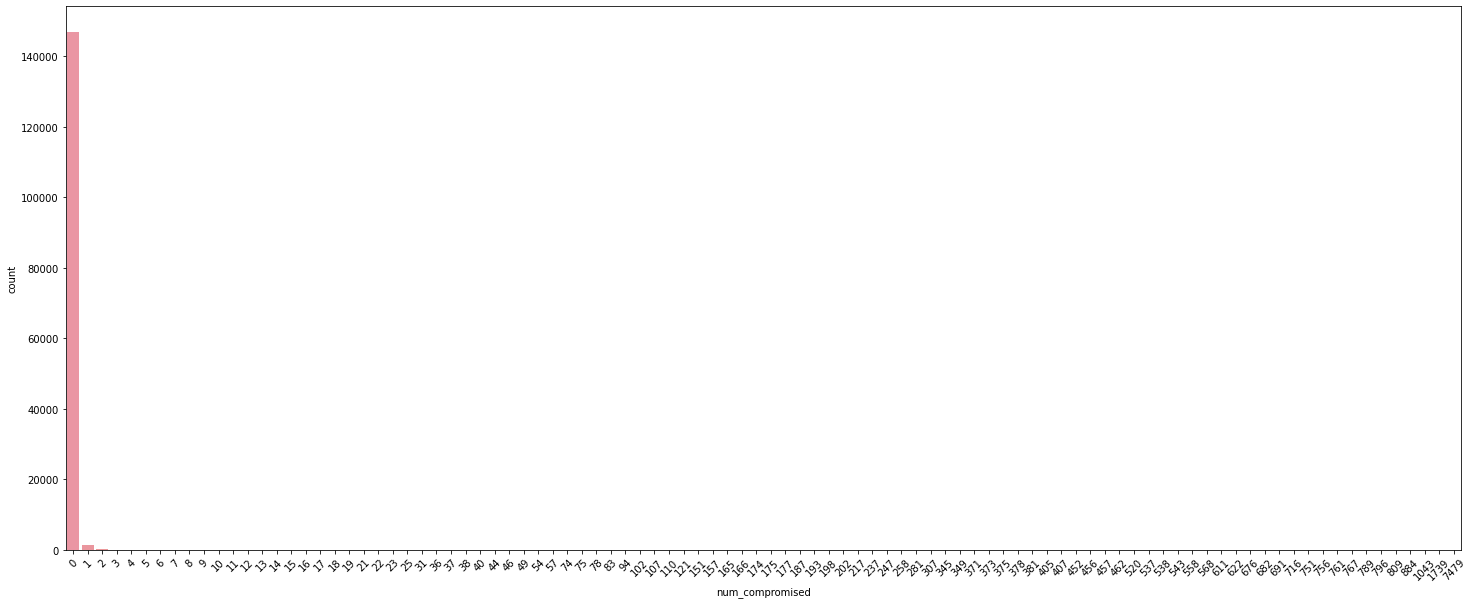

In [29]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="num_compromised", data=df)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

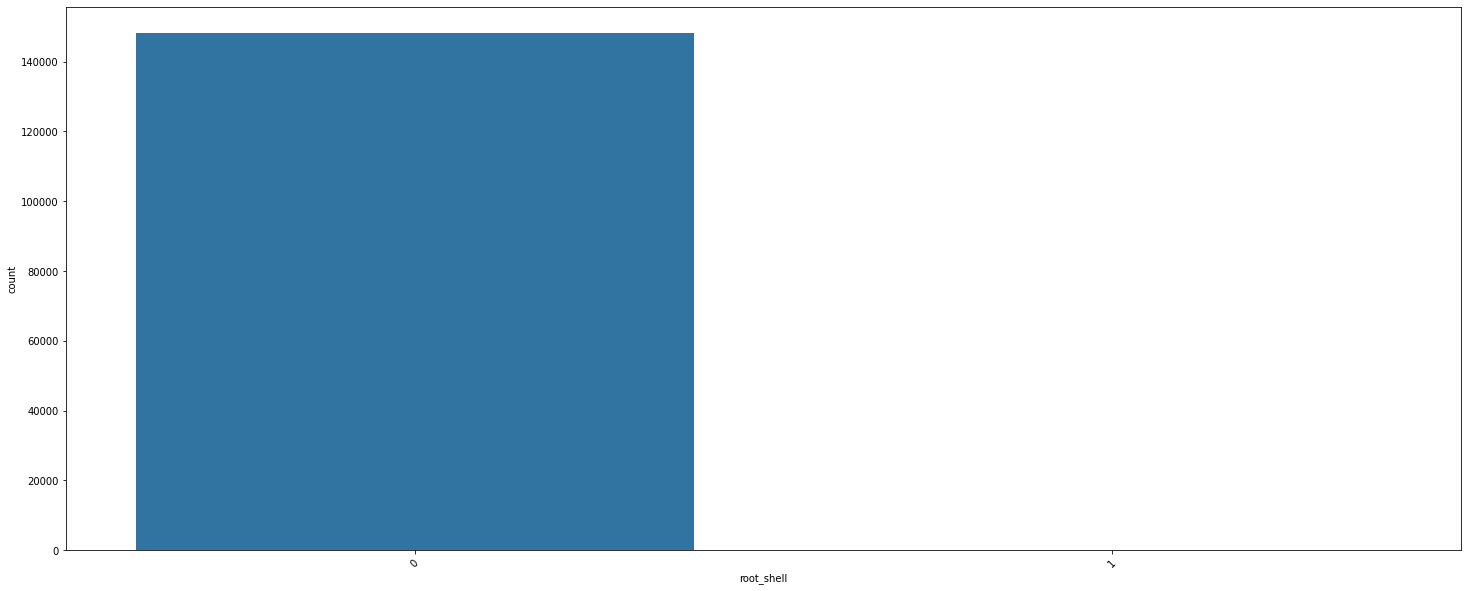

In [30]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="root_shell", data=df)
plt.xticks(rotation=45)

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

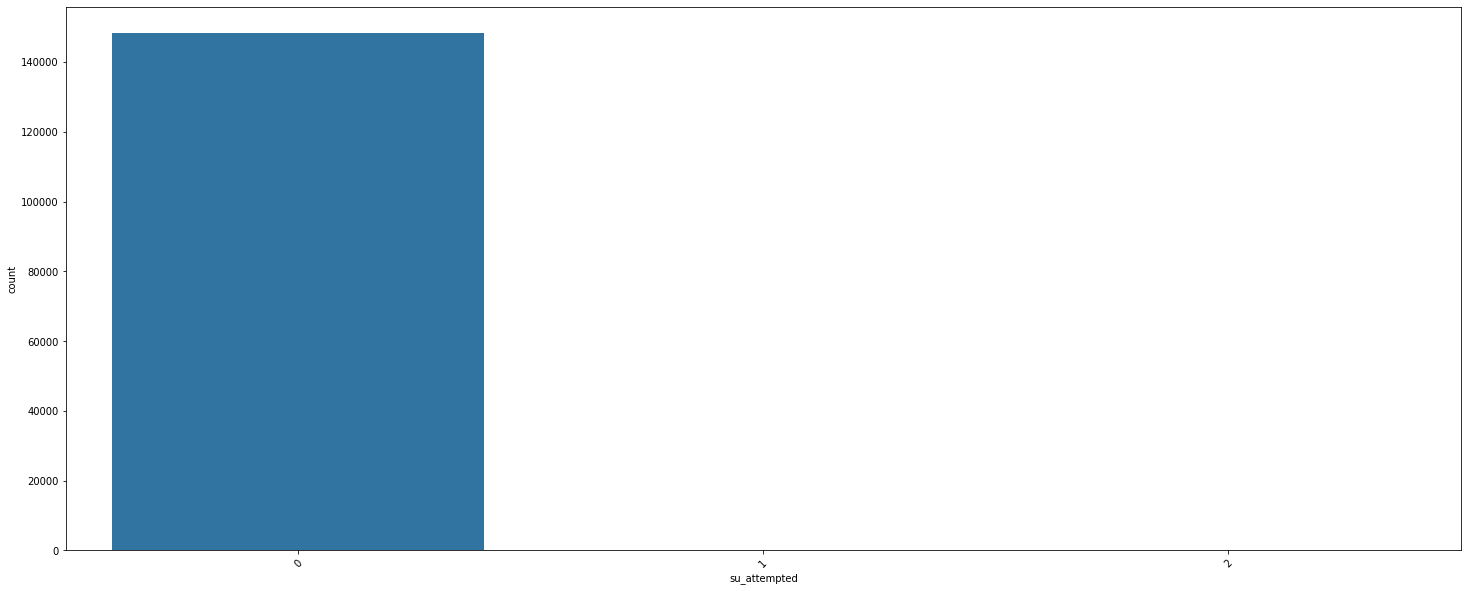

In [31]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="su_attempted", data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '12'),
  Text(12, 0, '14'),
  Text(13, 0, '16'),
  Text(14, 0, '17'),
  Text(15, 0, '22'),
  Text(16, 0, '23'),
  Text(17, 0, '26'),
  Text(18, 0, '31'),
  Text(19, 0, '36'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '45'),
  Text(24, 0, '47'),
  Text(25, 0, '51'),
  Text(26, 0, '54'),
  Text(27, 0, '55'),
  Text(28, 0, '71'

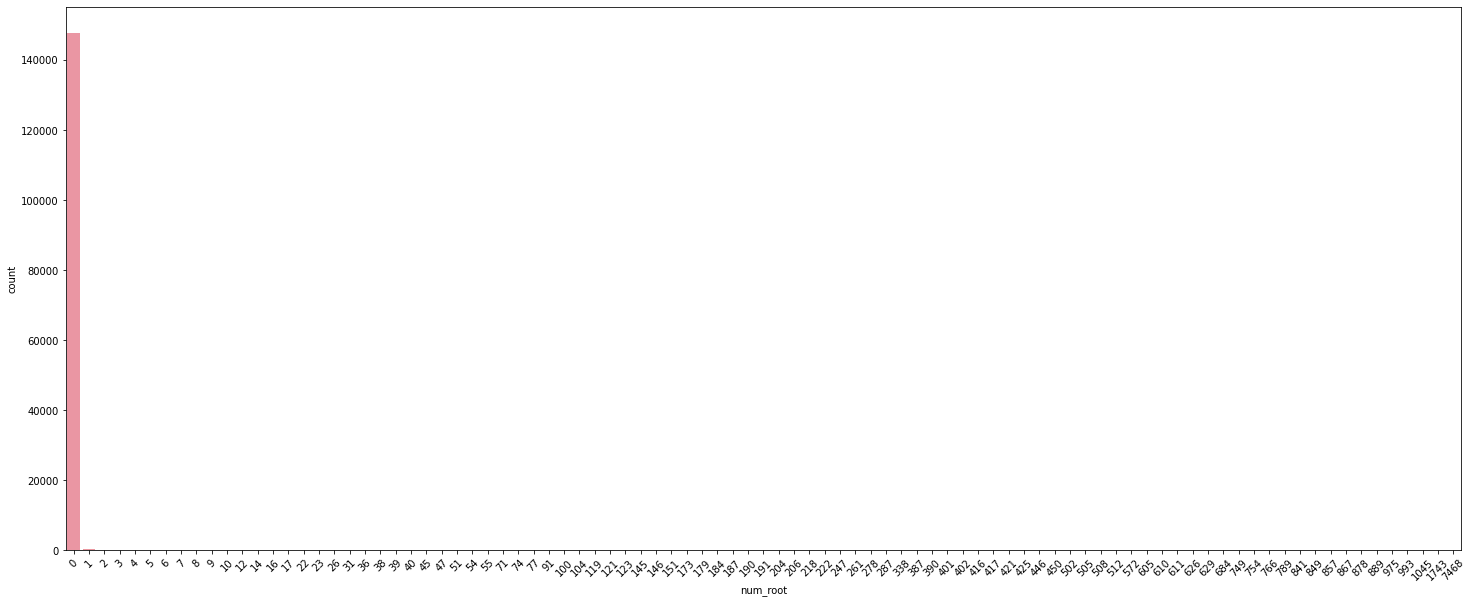

In [32]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="num_root", data=df)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

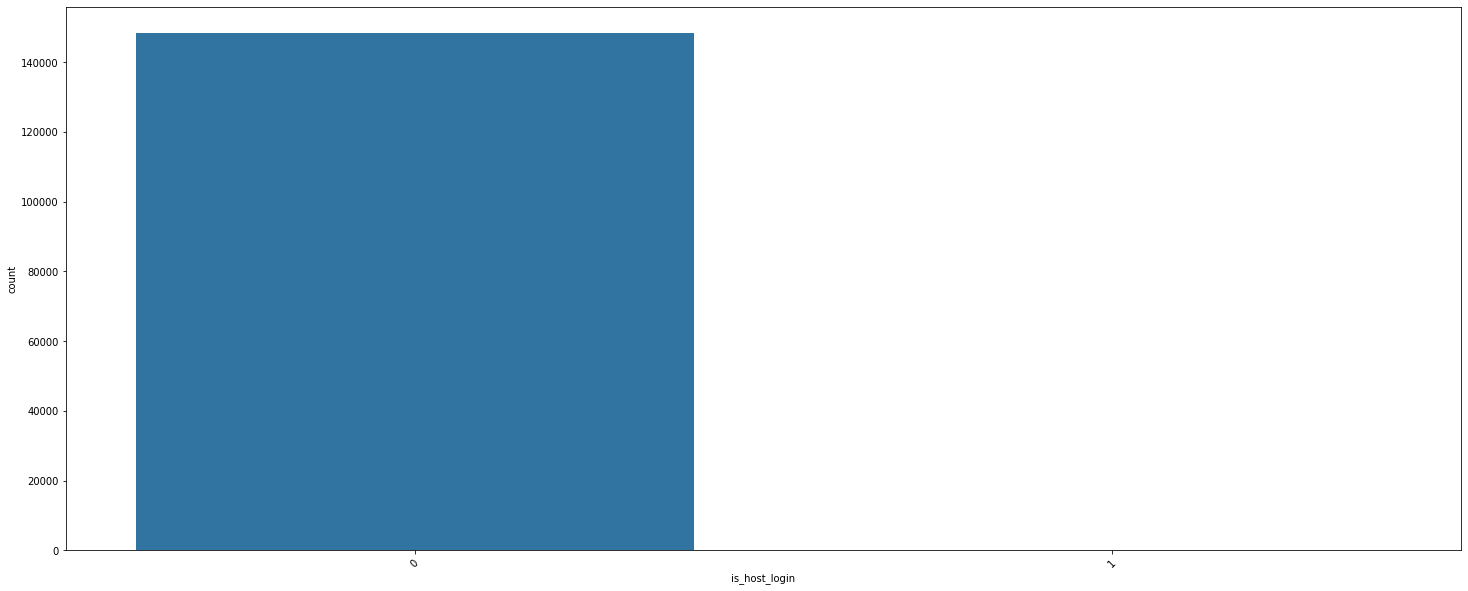

In [33]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="is_host_login", data=df)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

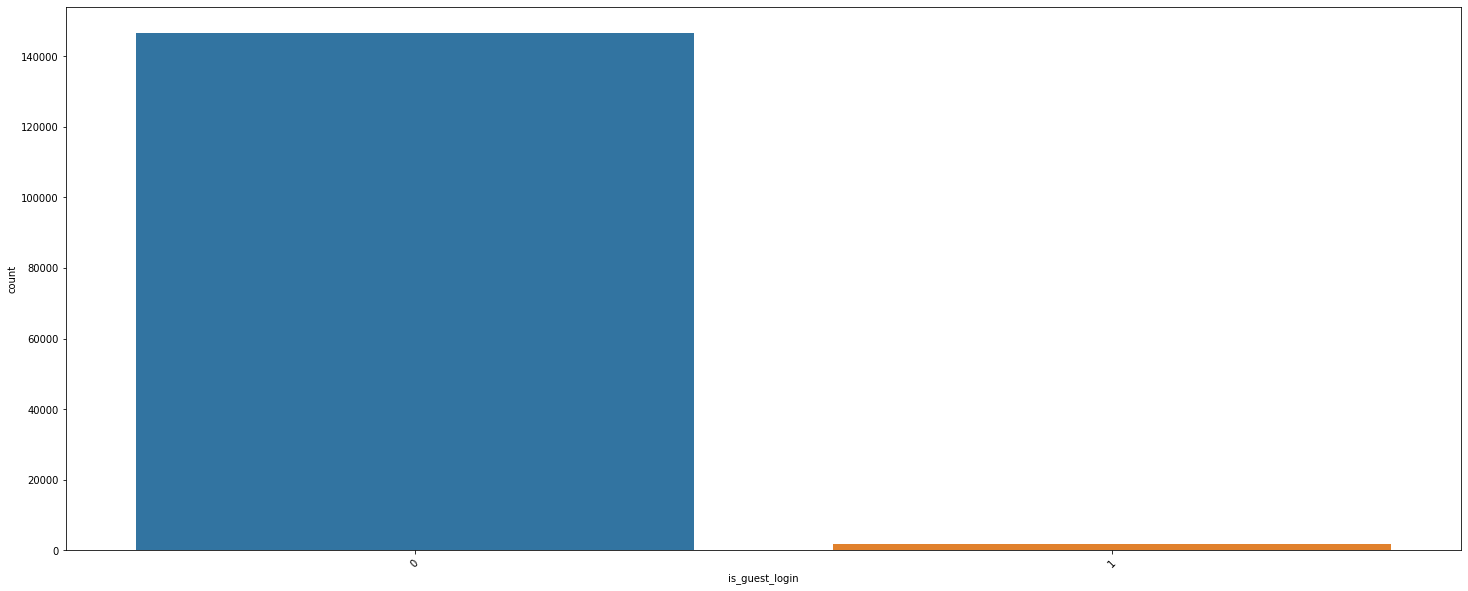

In [34]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="is_guest_login", data=df)
plt.xticks(rotation=45)

In [35]:
one_hot1 = pd.get_dummies(df['protocol'])
one_hot2 = pd.get_dummies(df['service'])
one_hot3 = pd.get_dummies(df['flag'])

In [36]:
df = df.drop(columns=['protocol', 'service', 'flag', 'other'])

In [37]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [38]:
df = df[['duration', 'src_bytes', 'dst_bytes', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted']]

In [39]:
df = df.append(one_hot1)
df = df.append(one_hot2)
df = df.append(one_hot3)

<ipython-input-39-265fad67b060>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(one_hot1)
<ipython-input-39-265fad67b060>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(one_hot2)
<ipython-input-39-265fad67b060>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(one_hot3)


In [42]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                           random_state=1, n_clusters_per_class=1)
#rng = np.random.RandomState(2)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
figure = plt.figure(figsize=(27, 9))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

IndentationError: unexpected indent (<ipython-input-42-2c2e08b866bf>, line 33)